![image](how.png)

**"Should I Stay or Should i Go (from the Hospital)"**

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns 
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
# la otra forma, pero lo mismo: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [260]:
df = pd.read_csv("/Users/Elsa/Desktop/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/train_set.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60


In [286]:
# Convierto las columnas que son object a numéricas:
df_string = df[df.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)
df_string

""
0
1
2
3
4
...
99995
99996
99997
99998


In [287]:
# Para poder volver a crear mi dataset completo, del dataframe original me quedo con todas las columnas que no son object
df_no_string = df[df.select_dtypes(exclude='object').columns]
df_no_string

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528.0,6,0,6,0,2,0,0,0,4.0,45810,2.0,0,0,2,0,2817,0.0
1,159472.0,23,0,6,0,4,0,0,0,2.0,128565,15.0,0,0,4,0,4498,0.0
2,309765.0,2,0,5,0,2,0,0,0,3.0,46565,5.0,0,0,2,0,4573,0.0
3,279614.0,32,0,9,0,3,0,0,0,4.0,124546,6.0,0,0,4,0,7202,0.0
4,147791.0,14,0,1,0,3,0,0,0,2.0,22729,8.0,0,0,2,0,3398,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0,0,0,1,0,2,2,1,0.0,0,0.0,0,2,0,5,0,10.0
99996,0.0,0,1,0,0,0,2,2,5,0.0,0,0.0,2,2,0,2,0,5.0
99997,0.0,0,0,0,0,0,2,1,5,0.0,0,0.0,1,1,0,3,0,3.0
99998,0.0,0,5,0,1,0,2,3,1,0.0,0,0.0,1,2,0,4,0,1.0


In [288]:
# Concateno los dos dataframe creados antes en uno sólo
df = pd. concat([df_no_string,df_string])
df = df[['0','1','2','3', '4', '5', '6', '7','8','9','10','11','12','13','14','15','16','17']]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528.0,6.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,4.0,45810.0,2.0,0.0,0.0,2.0,0.0,2817.0,0.0
1,159472.0,23.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,2.0,128565.0,15.0,0.0,0.0,4.0,0.0,4498.0,0.0
2,309765.0,2.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,3.0,46565.0,5.0,0.0,0.0,2.0,0.0,4573.0,0.0
3,279614.0,32.0,0.0,9.0,0.0,3.0,0.0,0.0,0.0,4.0,124546.0,6.0,0.0,0.0,4.0,0.0,7202.0,0.0
4,147791.0,14.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,22729.0,8.0,0.0,0.0,2.0,0.0,3398.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
# quitad la primera columna porque corresponde con el case_id y por tanto no le servirá al modelo para aprender
df.drop("0",1,inplace = True)

In [290]:
# Convierto todos los nan en 0
df.fillna(0, inplace=True)

In [180]:
# Calculamos la matriz de correlación
df.corr()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,1.000000,-0.417484,0.661047,-0.490960,0.723709,-0.770032,-0.713295,-0.674488,0.750546,0.646926,0.597996,-0.519439,-0.653406,0.650960,-0.699110,0.802393,-0.552006
2,-0.417484,1.000000,-0.369320,0.482496,-0.445350,0.463398,0.536980,0.273885,-0.453507,-0.389304,-0.364283,0.368188,0.390114,-0.397936,0.425146,-0.478484,0.370616
3,0.661047,-0.369320,1.000000,-0.434318,0.640352,-0.681195,-0.631003,-0.596674,0.651828,0.569748,0.524257,-0.459513,-0.578024,0.593118,-0.618455,0.695762,-0.488322
4,-0.490960,0.482496,-0.434318,1.000000,-0.523730,0.557281,0.537228,0.237787,-0.533322,-0.457820,-0.428395,0.370788,0.458518,-0.467972,0.487250,-0.562696,0.398325
5,0.723709,-0.445350,0.640352,-0.523730,1.000000,-0.821430,-0.760906,-0.719509,0.779735,0.690808,0.641307,-0.554111,-0.697019,0.730305,-0.745774,0.827705,-0.588851
6,-0.770032,0.463398,-0.681195,0.557281,-0.821430,1.000000,0.791940,0.740689,-0.836475,-0.718055,-0.671905,0.552751,0.725112,-0.733977,0.784186,-0.882545,0.623005
7,-0.713295,0.536980,-0.631003,0.537228,-0.760906,0.791940,1.000000,0.648432,-0.774842,-0.665147,-0.622398,0.540151,0.673321,-0.679896,0.728532,-0.817517,0.640704
8,-0.674488,0.273885,-0.596674,0.237787,-0.719509,0.740689,0.648432,1.000000,-0.732687,-0.628960,-0.588537,0.524427,0.640843,-0.642907,0.680855,-0.773041,0.534893
9,0.750546,-0.453507,0.651828,-0.533322,0.779735,-0.836475,-0.774842,-0.732687,1.000000,0.703578,0.652223,-0.564260,-0.709785,0.741702,-0.759433,0.871876,-0.599636
10,0.646926,-0.389304,0.569748,-0.457820,0.690808,-0.718055,-0.665147,-0.628960,0.703578,1.000000,0.566715,-0.484377,-0.609301,0.618912,-0.651919,0.740277,-0.514745


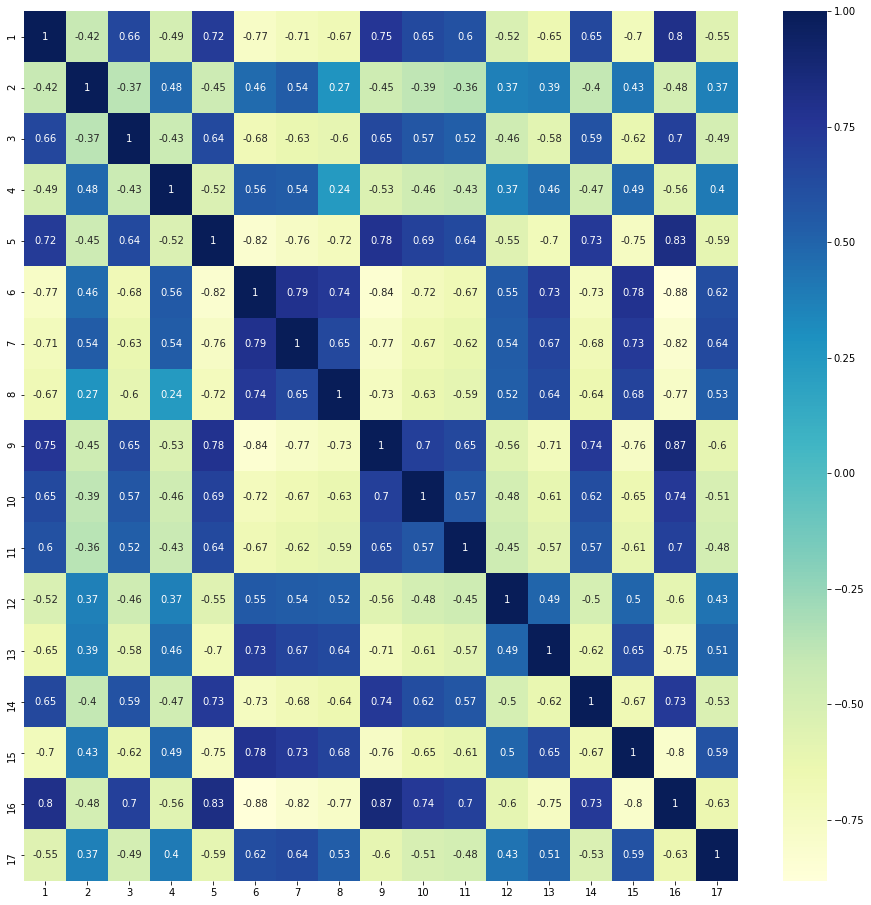

In [98]:
# Dibujo la matriz de correlación
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

In [216]:
# PROBLEMA DE CLASIFICACIÓN Hemos cambiado a clases por números
df["17"].value_counts()

0.0     107427
2.0      27452
1.0      24476
3.0      17311
5.0      10984
4.0       3668
7.0       3297
10.0      2150
8.0       1470
9.0        908
6.0        857
Name: 17, dtype: int64

In [291]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,6.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,4.0,45810.0,2.0,0.0,0.0,2.0,0.0,2817.0,0.0
1,23.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,2.0,128565.0,15.0,0.0,0.0,4.0,0.0,4498.0,0.0
2,2.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,3.0,46565.0,5.0,0.0,0.0,2.0,0.0,4573.0,0.0
3,32.0,0.0,9.0,0.0,3.0,0.0,0.0,0.0,4.0,124546.0,6.0,0.0,0.0,4.0,0.0,7202.0,0.0
4,14.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,22729.0,8.0,0.0,0.0,2.0,0.0,3398.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
type(df['1'][1])

pandas.core.series.Series

In [292]:
df["1"] = df["1"].apply(lambda x: int(math.floor(x)))
df["2"] = df["2"].apply(lambda x: int(math.floor(x)))
df["3"] = df["3"].apply(lambda x: int(math.floor(x)))
df["4"] = df["4"].apply(lambda x: int(math.floor(x)))
df["5"] = df["5"].apply(lambda x: int(math.floor(x)))
df["6"] = df["6"].apply(lambda x: int(math.floor(x)))
df["7"] = df["7"].apply(lambda x: int(math.floor(x)))
df["8"] = df["8"].apply(lambda x: int(math.floor(x)))
df["10"] = df["10"].apply(lambda x: int(math.floor(x)))
df["12"] = df["12"].apply(lambda x: int(math.floor(x)))
df["13"] = df["13"].apply(lambda x: int(math.floor(x)))
df["14"] = df["14"].apply(lambda x: int(math.floor(x)))
df["15"] = df["15"].apply(lambda x: int(math.floor(x)))
df["16"] = df["16"].apply(lambda x: int(math.floor(x)))
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,6,0,6,0,2,0,0,0,4.0,45810,2.0,0,0,2,0,2817,0.0
1,23,0,6,0,4,0,0,0,2.0,128565,15.0,0,0,4,0,4498,0.0
2,2,0,5,0,2,0,0,0,3.0,46565,5.0,0,0,2,0,4573,0.0
3,32,0,9,0,3,0,0,0,4.0,124546,6.0,0,0,4,0,7202,0.0
4,14,0,1,0,3,0,0,0,2.0,22729,8.0,0,0,2,0,3398,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0
99996,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0
99997,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0
99998,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0


In [92]:
# esto es necesario para evitar futuros errores pero si quitaráis las columnas con Nan no haría falta
# Nan no vale pero 0 sí ________
df = df.dropna()
# esto quita filas y por tanto no se lo podremos aplicar al dataset de predicción

#### 1. Definir X e y

In [293]:
# coger las columnas 1, 3, 5, 9 tiene solo valor ilustrativo, NO LO COPIÉIS
X = np.array(df[['1','5', '6', '7','9','15','16']])
y = np.array(df['17'])
X.shape

(400000, 7)

In [294]:
y.shape

(400000,)

#### 2. Dividir X_train, X_test, y_train, y_test

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [296]:
X_train

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.300e+01, 2.000e+00, 0.000e+00, ..., 4.000e+00, 0.000e+00,
        5.112e+03],
       [2.600e+01, 2.000e+00, 0.000e+00, ..., 2.000e+00, 0.000e+00,
        4.279e+03],
       ...,
       [1.000e+01, 3.000e+00, 0.000e+00, ..., 3.000e+00, 0.000e+00,
        3.983e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

#### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros

In [ ]:
#################
XGBoost

In [205]:
from xgboost import XGBClassifier 
## modelo XGBoost
model = XGBClassifier() 
model.fit(X_train, y_train) 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Make predictions for test data 
y_pred = model.predict(X_test)
y_pred.shape

In [ ]:
model.score(X_test, y_test)

In [ ]:
##################

In [297]:
model = linear_model.LogisticRegression()
# la otra forma, pero lo mismo: model = LogisticRegression()

#### 4. Entrenar el modelo con X_train, y_train

In [298]:
model.fit(X_train, y_train)

LogisticRegression()

#### 5. Predecir con el modelo ya entrenado con X_test/to_pred

In [299]:
predictions = model.predict(X_test)
print(predictions)

[0. 2. 0. ... 0. 0. 0.]


#### 6. Sacar métricas, valorar el modelo 

In [300]:
model.score(X_test,y_test)

0.815975

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [301]:
to_pred = pd.read_csv("/Users/Elsa/Desktop/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/test_set.csv")

In [302]:
# la primera columna es id_case, deberéis quitarla para hacer la predicción si la habéis quitado para entrenar
# pero guardarla para incluirla en la submission

# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI

to_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [303]:
to_pred.drop("0",1,inplace = True)

In [312]:
to_pred_string = df[df.select_dtypes('object').columns].apply(LabelEncoder().transform)
to_pred_no_string = df[df.select_dtypes(exclude='object').columns]
to_pred = pd. concat([to_pred_no_string,to_pred_string],ignore_index=True)
#to_pred = to_pred[['1','5', '6', '7','9','15','16']]

In [313]:
# para evitar este error ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
to_pred = to_pred.fillna(0)

In [314]:
to_pred

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,6.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,4.0,45810.0,2.0,0.0,0.0,2.0,0.0,2817.0,0.0
1,23.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,2.0,128565.0,15.0,0.0,0.0,4.0,0.0,4498.0,0.0
2,2.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,3.0,46565.0,5.0,0.0,0.0,2.0,0.0,4573.0,0.0
3,32.0,0.0,9.0,0.0,3.0,0.0,0.0,0.0,4.0,124546.0,6.0,0.0,0.0,4.0,0.0,7202.0,0.0
4,14.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,22729.0,8.0,0.0,0.0,2.0,0.0,3398.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
to_pred["1"] = to_pred["1"].apply(lambda x: int(math.floor(x)))
to_pred["2"] = to_pred["2"].apply(lambda x: int(math.floor(x)))
to_pred["3"] = to_pred["3"].apply(lambda x: int(math.floor(x)))
to_pred["4"] = to_pred["4"].apply(lambda x: int(math.floor(x)))
to_pred["5"] = to_pred["5"].apply(lambda x: int(math.floor(x)))
to_pred["6"] = to_pred["6"].apply(lambda x: int(math.floor(x)))
to_pred["7"] = to_pred["7"].apply(lambda x: int(math.floor(x)))
to_pred["8"] = to_pred["8"].apply(lambda x: int(math.floor(x)))
to_pred["10"] = to_pred["10"].apply(lambda x: int(math.floor(x)))
to_pred["12"] = to_pred["12"].apply(lambda x: int(math.floor(x)))
to_pred["13"] = to_pred["13"].apply(lambda x: int(math.floor(x)))
to_pred["14"] = to_pred["14"].apply(lambda x: int(math.floor(x)))
to_pred["15"] = to_pred["15"].apply(lambda x: int(math.floor(x)))
to_pred["16"] = to_pred["16"].apply(lambda x: int(math.floor(x)))
to_pred

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,6,0,6,0,2,0,0,0,4.0,45810,2.0,0,0,2,0,2817,0.0
1,23,0,6,0,4,0,0,0,2.0,128565,15.0,0,0,4,0,4498,0.0
2,2,0,5,0,2,0,0,0,3.0,46565,5.0,0,0,2,0,4573,0.0
3,32,0,9,0,3,0,0,0,4.0,124546,6.0,0,0,4,0,7202,0.0
4,14,0,1,0,3,0,0,0,2.0,22729,8.0,0,0,2,0,3398,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0
799996,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0
799997,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0
799998,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0


In [319]:
predictions_submit = model.predict(to_pred[['1','5', '6', '7','9','15','16']])
inverse_transform(to_pred_string.reshape(-1,1))

NameError: name 'inverse_transform' is not defined

In [282]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

,id,days
0,161528.0,0.0
1,159472.0,0.0
2,309765.0,0.0
3,279614.0,0.0
4,147791.0,0.0
...,...,...
199995,0.0,2.0
199996,0.0,2.0
199997,0.0,2.0
199998,0.0,1.0


In [283]:
sample = pd.read_csv("/Users/Elsa/Desktop/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/sample_submission.csv")

In [284]:
sample.shape

(133744, 2)

In [285]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("to_submit1.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!